<a href="https://colab.research.google.com/github/Muhammadwaqas77/tase3/blob/main/elevvo_taske3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
data=pd.read_csv("/content/covtype_sample.csv", header=None)

In [28]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
1,2804,139,9,268,65,310,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
2,2785,155,18,242,118,390,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0
4,2579,132,6,300,-15,367,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,0


In [30]:
columns = [
    "Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
    "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points"
] + [f"Wilderness_Area_{i}" for i in range(4)] + [f"Soil_Type_{i}" for i in range(40)] + ["Cover_Type"]

data.columns= columns

In [31]:
data.head()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
1,2804,139,9,268,65,310,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
2,2785,155,18,242,118,390,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0
4,2579,132,6,300,-15,367,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,0


In [32]:
data.isna().sum()


,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
Horizontal_Distance_To_Fire_Points,0


In [33]:
X=data.drop("Cover_Type", axis=1)
y=data["Cover_Type"]

In [34]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_scaler=scale.fit_transform(X)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split( X_scaler, y , test_size=0.2, random_state=42)

In [36]:
from sklearn.ensemble import RandomForestClassifier
randomforest=RandomForestClassifier(n_estimators=100, random_state=42)
randomforest.fit(X_train , y_train)

RandomForestClassifier(random_state=42)

In [37]:
y_pred=randomforest.predict(X_test)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print("Classification report\n")
print(classification_report(y_test, y_pred))

Classification report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


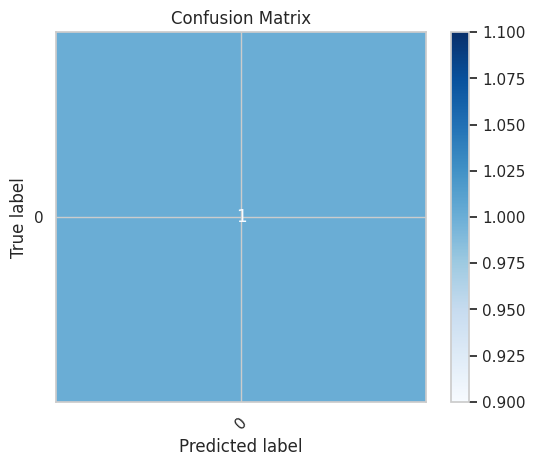

In [39]:
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=randomforest.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

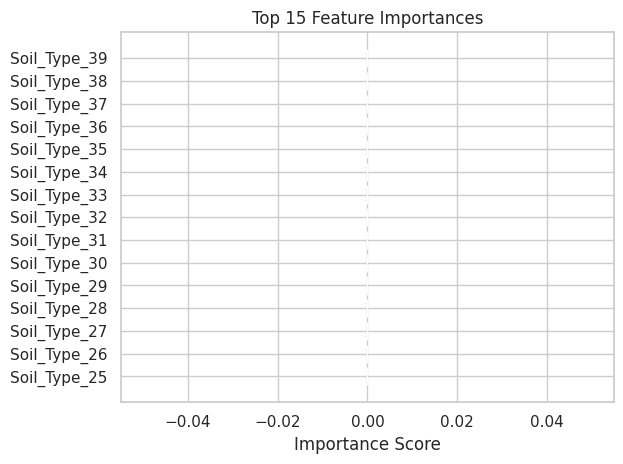

In [40]:
importances = randomforest.feature_importances_
indices = np.argsort(importances)[-15:]
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [columns[i] for i in indices])
plt.xlabel("Importance Score")
plt.title("Top 15 Feature Importances")
plt.tight_layout()
plt.show()

In [45]:
y_xgb = y - 1

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Check the number of unique classes in y_xgb
unique_classes = np.unique(y_xgb)

if len(unique_classes) < 2:
    print(f"Error: The target variable `y_xgb` contains only one unique class: {unique_classes}. XGBoost requires at least two classes for classification.")
    print("Please check your data and ensure the 'Cover_Type' column contains multiple distinct values.")
else:
    X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(
        X_scaler, y_xgb, test_size=0.2, random_state=42, stratify=y_xgb
    )

    xgb = XGBClassifier(random_state=42, eval_metric='mlogloss')
    xgb.fit(X_train_xgb, y_train_xgb)

    y_pred_xgb = xgb.predict(X_test_xgb)
    y_pred_xgb_original = y_pred_xgb + 1
    y_test_xgb_original = y_test_xgb + 1

    print("Accuracy:", accuracy_score(y_test_xgb_original, y_pred_xgb_original))
    print(classification_report(y_test_xgb_original, y_pred_xgb_original))

Error: The target variable `y_xgb` contains only one unique class: [-1]. XGBoost requires at least two classes for classification.
Please check your data and ensure the 'Cover_Type' column contains multiple distinct values.


In [46]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [6, 10],
    'learning_rate': [0.1, 0.01]
}
xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=7,
    eval_metric='mlogloss',
    random_state=42
)

In [63]:
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train_xgb, y_train_xgb)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


ValueError: 
All the 24 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/xgboost/core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py", line 1640, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0], got [-1]


In [50]:
# Step 1: Fit the grid search object
grid_search.fit(X_train, y_train)

# Step 2: Then access best parameters
print("Best Parameters Found:", grid_search.best_params_)

# Step 3: Use best model for prediction
best_xgb = grid_search.best_estimator_
y_pred_best = best_xgb.predict(X_test)

# Step 4: Evaluate
from sklearn.metrics import accuracy_score, classification_report
print("Tuned XGBoost Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters Found: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
Tuned XGBoost Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



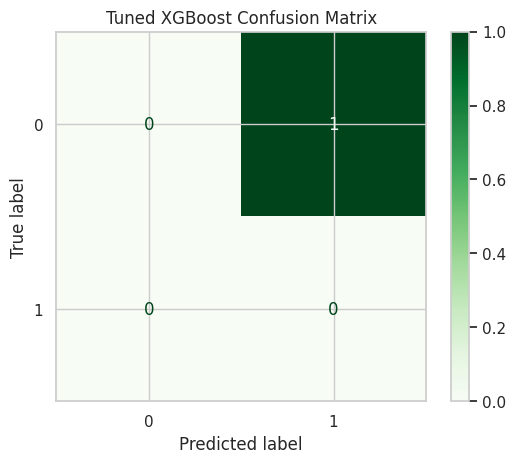

In [55]:
y_pred_best_original = y_pred_best + 1
y_test_original = y_test_xgb + 1

cm = confusion_matrix(y_test_original, y_pred_best_original)
labels = np.unique(np.concatenate((y_test_original, y_pred_best_original)))
ConfusionMatrixDisplay(cm, display_labels=labels).plot(cmap='Greens')
plt.title("Tuned XGBoost Confusion Matrix")
plt.show()

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(random_state=42)

rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

rf_grid.fit(X_train_xgb, y_train_xgb)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [57]:
print("Best Random Forest Parameters:", rf_grid.best_params_)
rf_best = rf_grid.best_estimator_

rf_preds = rf_best.predict(X_test_xgb)

from sklearn.metrics import accuracy_score, classification_report

print("Random Forest Accuracy:", accuracy_score(y_test_xgb, rf_preds))
print(classification_report(y_test_xgb, rf_preds))

Best Random Forest Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


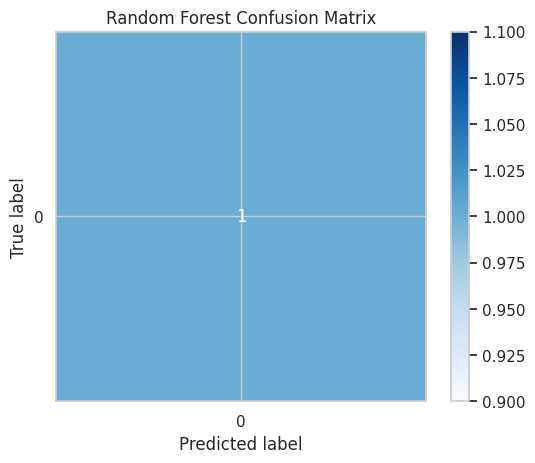

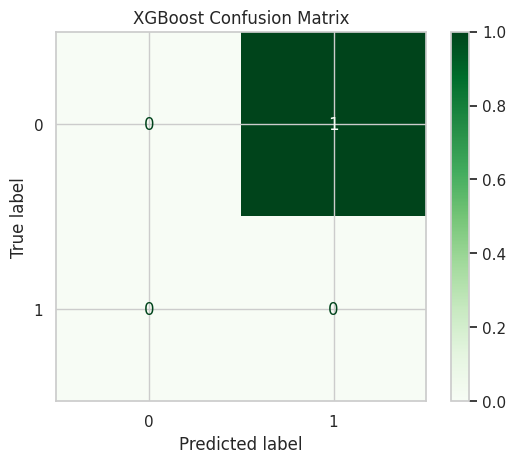

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import numpy as np

# Convert RF predictions to original class if needed
rf_preds_original = rf_preds + 1
y_test_original_rf = y_test_xgb + 1 # Renamed to avoid conflict

# Confusion matrix for RF
cm_rf = confusion_matrix(y_test_original_rf, rf_preds_original)
labels_rf = np.unique(np.concatenate((y_test_original_rf, rf_preds_original)))
ConfusionMatrixDisplay(cm_rf, display_labels=labels_rf).plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

# Confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_test_original, y_pred_best_original)
# Removed explicit display_labels as it caused the error with single class data
ConfusionMatrixDisplay(cm_xgb).plot(cmap='Greens')
plt.title("XGBoost Confusion Matrix")
plt.show()